# SIT744 Assignment 1: Image Classification with Deep Feedforward Neural Network

<div class="alert-info">
    <p>Due: <strong>8pm 24 August 2020</strong>  (Monday)</p>


This is an <strong>individual</strong> assignment. It contributes <strong>30%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment1_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment1_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment1_solution.ipynp </li>
<li> 123456_assignment1_output.html</li>
</ul>
</p>

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective



This assignment is for you to demonstrate the knowledge in deep learning that you have acquired from the lectures and practical lab materials. Most tasks in this assignment are straightforward applications of the practical materials in weeks 1-5. Going through these materials before attempting this assignment is highly recommended.

In this assignment, you are going to work with the Fashion-MNIST dataset for image recognition. The dataset contains 10 classes of 28x28 grayscale images. You will see some examples in the visualization task below. 

This assignment consists of five tasks.


## Task 1 Load the data

*(weight ~5%)*

Load the Fashion MNIST dataset (https://github.com/zalandoresearch/fashion-mnist). You may get the data via Keras (keras.datasets) or Tensorflow Datasets (tfds). 

In [74]:
! pip install -q tfds-nightly tensorflow matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
import keras
import datetime


((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()


## Task 2 Understand the data

*(weight ~15%)*



Display 100 images from the train set in the form of 10x10 matrix.

Answer the following questions:

1. What are the unique labels in this dataset?
2. How many training images and how many test images?
3. What is the size of each image?
4. Find out the numeric range of the input. Do we need to rescale the input?
5. In our problem, what are the shapes of input tensors and target tensors? Do you need to reshape the input?


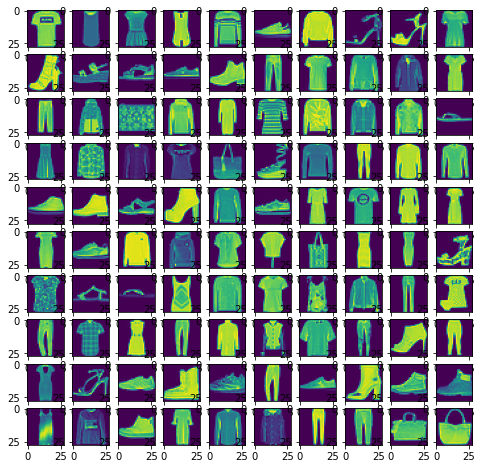

unique labels 10
train size (60000, 28, 28)
test size (10000, 28, 28)
range of input is 0 to 255, yes we need to rescale them 
range of input is 0 to 255, yes we need to rescale them 


In [75]:
fig=plt.figure(figsize=(8, 8))
for i in range(1, 10*10 +1):
    img = np.random.randint(10, size=(20,20))
    fig.add_subplot(10, 10, i)
    plt.imshow(trainX[i])
plt.show()

print("unique labels",len(np.unique(trainY)))
print("train size",trainX.shape)
print("test size",testX.shape)
print ("range of input is 0 to 255, yes we need to rescale them ")
print ("range of input is 0 to 255, yes we need to rescale them ")
# print("size of each image 28*28*1")




## Task 3 Construct an input pipeline

*(weight ~15%)*

Creat train/validate/test data splits and construct tf.data pipelines. Make sure that the training data is batched.


In [77]:

def preprocess(image, label):
    # you can add data augmentation here 
    image = image/255.0
    #Make sure the image is still in [0, 1]
    image = tf.clip_by_value(image, 0.0, 1.0)
    return image, label

In [79]:
# x_train, x_val, y_train, y_val = train_test_split(trainX, trainY, train_size=0.9,random_state=32 )
print("Create data pipeline on training set")
train, test = tf.keras.datasets.fashion_mnist.load_data()
trainX, labels = train
trainX=trainX.astype('float32')
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
x_train, x_val, y_train, y_val = train_test_split(trainX, labels, train_size=0.9,random_state=32 )

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(len(x_train))
train_dataset = train_dataset.map(preprocess, num_parallel_calls=4)
train_dataset = train_dataset.batch(batch_size=256)
train_dataset = train_dataset.prefetch(1)
trainx, label = next(iter(train_dataset))
trainy = tf.keras.utils.to_categorical(label)

Create data pipeline on training set


In [80]:
 print("Execute data pipeline on val set")
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.shuffle(len(x_val))
val_dataset = val_dataset.map(train_preprocess, num_parallel_calls=4)
val_dataset = val_dataset.batch(batch_size=256)
val_dataset = val_dataset.prefetch(1)
valx, label = next(iter(val_dataset))
valy = tf.keras.utils.to_categorical(label)

Execute data pipeline on val set


In [81]:
 print("Execute data pipeline on test set")
testX, labels = test
testX=testX.astype('float32')
testX = testX.reshape((testX.shape[0], 28, 28, 1))

test_dataset = tf.data.Dataset.from_tensor_slices((testX, labels))
test_dataset = test_dataset.shuffle(len(testX))
test_dataset = test_dataset.map(train_preprocess, num_parallel_calls=4)
test_dataset = test_dataset.batch(batch_size=256)
test_dataset = test_dataset.prefetch(1)
testx, label = next(iter(test_dataset))
testy = tf.keras.utils.to_categorical(label)

Execute data pipeline on test set


## Task 4 Construct a deep forward neural network

*(weight ~35%)*

### Task 4.1 Setting up a model for training

Construct a deep feedforward neural network. You need to decide and report the following configurations:

- Output layer: 
    - How many output nodes?
    - Which activation function?
- Hidden layers:
    - How many hidden layers?
    - How many nodes in each layer?
    - Which activation function for each layer?
- Input layer
    - What is the input size?
- The loss function
- The metrics for model evaluation (which may be different from the loss function)
- The optimiser

Justify your model design decisions.

Plot the model structure `using keras.utils.plot_model` or similar tools.

In [90]:

model = Sequential()
model.add(Conv2D( 32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform',bias_initializer=tf.constant_initializer(0.1)))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.001, momentum=0.9, clipnorm=1.0)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_56 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
None


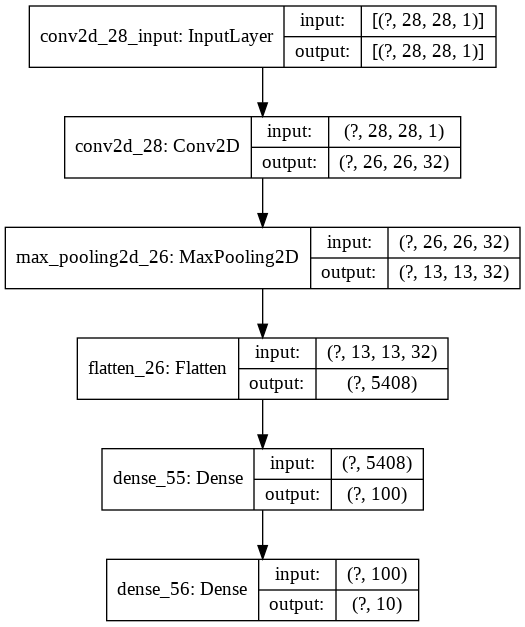

In [83]:
print(model.summary())

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [84]:

print ("Output layer: How many output nodes?: 10")
print ("Output layer: Which activation function? :softmax")

print ("Hidden layer: How many hidden layers? : 2")
print ("Hidden layer: How many nodes in each layer?: 32,100")
print ("Hidden layer: Which activation function for each layer? 'relu'")

print ("Input layer: What is the input size? : 28*28*1")
print ("Input layer: The loss function :categorical_crossentropy" )
print ("Input layer: The metrics for model evaluation: accuracy ")
print ("The optimiser : Stochastic gradient descent ")




Output layer: How many output nodes?: 10
Output layer: Which activation function? :softmax
Hidden layer: How many hidden layers? : 2
Hidden layer: How many nodes in each layer?: 32,100
Hidden layer: Which activation function for each layer? 'relu'
Input layer: What is the input size? : 28*28*1
Input layer: The loss function :categorical_crossentropy
Input layer: The metrics for model evaluation: accuracy 
The optimiser : Stochastic gradient descent 


### Task 4.2 Fitting the model

Now fit the model. Decide and report the following training setting:

1. The training batch size
2. The number of training epochs (at least 1,000 epochs recommended)
3. The learning rate. If you used momentum or a learning rate schedule, please report the configuration as well.

Plot the training and validation loss and accuracy. Answer the following questions:

1. Do you see overfitting or underfitting? Why?
2. If you see overfitting, at which epoch did it happen?

In [91]:

print("training model...")
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,
                                                write_images=True, write_grads=True  )

history = model.fit(x=trainx, y=trainy,validation_data=(testx, testy),batch_size=16, 
                    epochs=1000,callbacks=[tensorboard_callback])

training model...
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/1000
16/16 [==============================] - 0s 21ms/step - loss: 2.4152 - accuracy: 0.1797 - val_loss: 2.2260 - val_accuracy: 0.2500
Epoch 2/1000
16/16 [==============================] - 0s 11ms/step - loss: 2.0269 - accuracy: 0.3398 - val_loss: 1.9287 - val_accuracy: 0.3516
Epoch 3/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.7578 - accuracy: 0.4453 - val_loss: 1.7241 - val_accuracy: 0.4219
Epoch 4/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.5708 - accuracy: 0.5000 - val_loss: 1.5653 - val_accuracy: 0.4609
Epoch 5/1000
16/16 [==============================] - 0s 11ms/step - loss: 1.4259 - accuracy: 0.5312 - val_loss: 1.4540 - val_accuracy: 0.4453
Epoch 6/1000
16/16 [==============================] - 0s 10ms/step - loss: 1.3173 - accuracy: 0.5430 - val_loss: 1.3386 - val_accuracy: 0.5195
Epoch 7/1000
16/16 [==============

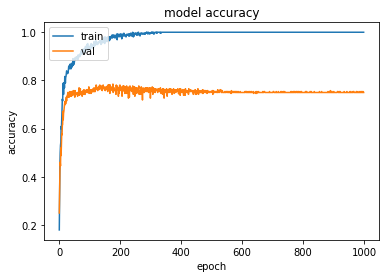

In [92]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [93]:
print ("The training batch size :32")
print ("The number of training epochs 1000")
print ("The learning rate. :0.001")
print ("Plot the training and validation loss and accuracy :above")
print ("Do you see overfitting or underfitting? Why? overfitting as accuracy is good in training set \
        but not good in validation")
print ("If you see overfitting, at which epoch did it happen?20")
  


The training batch size :32
The number of training epochs 1000
The learning rate. :0.001
Plot the training and validation loss and accuracy :above
Do you see overfitting or underfitting? Why? overfitting as accuracy is good in training set         but not good in validation
If you see overfitting, at which epoch did it happen?20


### Task 4.3 Check the convergence through gradient

Use  TensorBoard to check the gradients. 

- Do you see vanishing or exploding gradients?
- Use the gradient norm to check if the training has converged to a local minimum.

Show screenshots of your TensorBoard output.

In [94]:
%tensorboard --logdir logs/fit
# %tensorboard --logdir $PWD/tensorboard_results

print("Do you see vanishing or exploding gradients?: yes it is vanishing as distribution is highly peaked \
      and concentrated around 0" )
print("implemented gradient norm by specifying the “clipnorm” argument on the optimizer;" )

<IPython.core.display.Javascript object>

Do you see vanishing or exploding gradients?: yes it is vanishing as distribution is highly peaked       and concentrated around 0
implemented gradient norm by specifying the “clipnorm” argument on the optimizer;


## Task 5 Fine-tuning the model

*(weight ~30%)*

You may see above that your model is overfitting. There are multiple things you can do. Below are some options:

1. Add dropout
2. Add Batch Normalisation
3. Add layer-specific weight regularizations
4. Change the learning rate

Apply different regularisation techniques to the model training. You may also try other techniques for improving training such as learning rate scheduling (see https://www.tensorflow.org/guide/keras/train_and_evaluate#using_learning_rate_schedules).

Run **five or more** experiments of different training configurations and record the test accuracy achieved in the Markdown table below. You may modify the table heading to match your experiment design.



|Dropout (rate)   | Batch Normalisation (Y/N)  | Optimiser  | Learning Rate  | Number of Epochs   |  Test Accuracy |
|---|---|---|---|---|---|
|   |   |   |   |   |   |
|   |   |   |   |   |   |
|   |   |   |   |   |   |



Answer the following questions:

1. Which configuration achieved the best test accuracy?
2. Which setting had the most impact and which one had the least impact?

In [62]:
from keras.layers import Dropout
model = Sequential()
model.add(Conv2D( 32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
# model.add(Dense(300, activation='relu', kernel_initializer='he_uniform',bias_initializer=tf.constant_initializer(0.1)))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform',bias_initializer=tf.constant_initializer(0.1)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.001, momentum=0.9, clipnorm=1.0)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# print(model.summary())

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
print("training model...")
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

                  
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=25),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,
                                                write_images=True, write_grads=True  ),
]


history = model.fit(x=trainx, y=trainy,validation_data=(valx, valy),batch_size=32, 
                    epochs=5000,callbacks=my_callbacks)
_, train_acc = model.evaluate(trainx, trainy, verbose=0)
_, test_acc = model.evaluate(testx, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

training model...
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/5000
8/8 [==============================] - 0s 39ms/step - loss: 2.5616 - accuracy: 0.0938 - val_loss: 2.3542 - val_accuracy: 0.1406
Epoch 2/5000
8/8 [==============================] - 0s 20ms/step - loss: 2.2657 - accuracy: 0.2227 - val_loss: 2.1755 - val_accuracy: 0.2539
Epoch 3/5000
8/8 [==============================] - 0s 20ms/step - loss: 2.0541 - accuracy: 0.3320 - val_loss: 2.0236 - val_accuracy: 0.3555
Epoch 4/5000
8/8 [==============================] - 0s 19ms/step - loss: 1.8519 - accuracy: 0.3945 - val_loss: 1.8989 - val_accuracy: 0.4258
Epoch 5/5000
8/8 [==============================] - 0s 19ms/step - loss: 1.7352 - accuracy: 0.4492 - val_loss: 1.7940 - val_accuracy: 0.4688
Epoch 6/5000
8/8 [==============================] - 0s 21ms/step - loss: 1.6491 - accuracy: 0.5117 - val_loss: 1.7061 - val_accuracy: 0.5117
Epoch 7/5000
8/8 [============================

In [73]:
print ("Dropout (rate)  Batch Normalisation (Y/N)       Optimiser         Learning Rate     Number of Epochs      Test Accuracy\n \
	0         N 				sgd 			0.01  		1000 			 0.734 \n \
	0.2       N 				sgd 			0.01  		1000  			0.754\n \
	0         Y 				sgd 			0.01  		1000  			0.711\n \
	0.2       Y 				sgd 			0.01  		1000 	 		0.746\n \
	0         N 				sgd			0.001 		1000  			0.73\n \
	0.2       N 				sgd 			0.001 		1000  			0.758\n \
	0         Y 				sgd 			0.001 		1000  			0.734\n \
	0.2       Y 				sgd 			0.001 		1000  			0.75\n \
")


Dropout (rate)  Batch Normalisation (Y/N)       Optimiser         Learning Rate     Number of Epochs      Test Accuracy
 	0         N 				sgd 			0.01  		1000 			 0.734 
 	0.2       N 				sgd 			0.01  		1000  			0.754
 	0         Y 				sgd 			0.01  		1000  			0.711
 	0.2       Y 				sgd 			0.01  		1000 	 		0.746
 	0         N 				sgd			0.001 		1000  			0.73
 	0.2       N 				sgd 			0.001 		1000  			0.758
 	0         Y 				sgd 			0.001 		1000  			0.734
 	0.2       Y 				sgd 			0.001 		1000  			0.75
 


## Task 6 Generate HTML output

Use *nbconvert* to convert your completed notebook into an HTML file and name it **[YourID]_assingment1_output.html**.

---
**END OF ASSIGNMENT ONE**

